<a href="https://colab.research.google.com/github/Teja023/Flight-Fare-prediction/blob/main/FlightFarePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi


In [2]:
import pandas as pd


In [3]:
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/flightfare/Data_Train.xlsx")
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data.dropna(inplace = True)

In [6]:
data.shape

(10682, 11)

In [5]:
data["journey_DAY"] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [6]:
data["journey_MONTH"] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.month

In [ ]:
data.head()

In [7]:
data["Journey_day"] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.day
data["Journey_mon"] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y").dt.month
data.drop("Date_of_Journey", axis=1, inplace=True)
data["Dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour
data["Dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute
data.drop("Dep_Time", axis=1, inplace=True)

In [ ]:
data.head()

In [8]:
data["Arr_hour"] = pd.to_datetime(data["Arrival_Time"]).dt.hour
data["Arr_min"] = pd.to_datetime(data["Arrival_Time"]).dt.minute
data.drop("Arrival_Time", axis=1, inplace=True)

In [ ]:
data.head()

In [9]:
data.drop(["journey_DAY"], axis=1, inplace=True)
data.drop(["journey_MONTH"], axis=1, inplace=True)

In [ ]:
data.head()

In [10]:
duration = list(data["Duration"])

for i in range(len(duration)):
  if len(duration[i].split()) != 2:
    if "h" in duration[i]:
      duration[i] = duration[i] + " 0m"
    else :
      duration [i] = "0h " + duration[i]
  
duration_hours = []
duration_mins = []

for i in range(len(duration)):
  duration_hours.append(int(duration[i].split(sep = "h")[0]))
  duration_mins.append(int(duration[i].split(sep = "m")[0].split(sep="h ")[-1]))
  
data["Duration_Hours"] = duration_hours
data["Duration_Mins"] = duration_mins
data.drop(["Duration"], axis=1, inplace=True)

In [ ]:
data.head()

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
sns.boxplot(x=data["Airline"], y=data["Price"], data=data)

In [ ]:
sns.barplot(x=data["Airline"], y=data["Price"])

In [12]:
Airline = data[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
sns.catplot(y = "Price", x="Source", data=data.sort_values("Price", ascending=False), kind="boxen", height=6, aspect=3)

In [ ]:
sns.boxplot(x="Source", y="Price", data=data, width=0.8 )

In [13]:
Source = data[["Source"]]
Source = pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [14]:
Destination = data[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [ ]:
data.head()

In [ ]:
data.replace({"non-stop":0, "1 stop":1, "2 stops":2, "3 stops":3, "4 stops":4})

In [ ]:
data.head()

In [15]:
data.drop(["Route", "Source", "Destination"], axis=1, inplace=True)

In [ ]:
data.head()

In [16]:
data1 = data.replace({"non-stop":0, "1 stop":1, "2 stops":2, "3 stops":3, "4 stops":4})

In [ ]:
data1.head()

In [17]:
data1.drop("Additional_Info", axis=1, inplace=True)

In [18]:
train_data = pd.concat([data1, Airline, Source, Destination], axis=1 )
train_data.head()

,Airline,Total_Stops,Price,Journey_day,Journey_mon,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_Hours,Duration_Mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [19]:
train_data.drop("Airline", axis=1, inplace=True)

In [20]:
train_data.head()

,Total_Stops,Price,Journey_day,Journey_mon,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_Hours,Duration_Mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [21]:
train_data.shape

(10682, 30)

In [22]:
data2 = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/flightfare/Test_set.xlsx")
data2.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [23]:
data2["Journey_day"] = pd.to_datetime(data2.Date_of_Journey, format="%d/%m/%Y").dt.day
data2["Journey_mon"] = pd.to_datetime(data2.Date_of_Journey, format="%d/%m/%Y").dt.month
data2.drop("Date_of_Journey", axis=1, inplace=True)
data2["Dep_hour"] = pd.to_datetime(data2["Dep_Time"]).dt.hour
data2["Dep_min"] = pd.to_datetime(data2["Dep_Time"]).dt.minute
data2.drop("Dep_Time", axis=1, inplace=True)

In [24]:
data2["Arr_hour"] = pd.to_datetime(data2["Arrival_Time"]).dt.hour
data2["Arr_min"] = pd.to_datetime(data2["Arrival_Time"]).dt.minute
data2.drop("Arrival_Time", axis=1, inplace=True)

In [25]:
duration2 = list(data2["Duration"])

for i in range(len(duration2)):
  if len(duration2[i].split()) != 2:
    if "h" in duration2[i]:
      duration2[i] = duration2[i] + " 0m"
    else :
      duration2[i] = "0h " + duration2[i]
  
duration_hours2 = []
duration_mins2 = []

for i in range(len(duration2)):
  duration_hours2.append(int(duration2[i].split(sep = "h")[0]))
  duration_mins2.append(int(duration2[i].split(sep = "m")[0].split(sep="h ")[-1]))
  
data2["Duration_Hours"] = duration_hours2
data2["Duration_Mins"] = duration_mins2
data2.drop(["Duration"], axis=1, inplace=True)

In [ ]:
data2.head()

In [26]:
Airline2 = data2[["Airline"]]
Airline2 = pd.get_dummies(Airline2, drop_first=True)
Airline2.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [27]:
Source2 = data2[["Source"]]
Source2 = pd.get_dummies(Source2, drop_first=True)
Source2.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [28]:
Destination2 = data2[["Destination"]]
Destination2 = pd.get_dummies(Destination2, drop_first=True)
Destination2.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [29]:
data3 = data2.replace({"non-stop":0, "1 stop":1, "2 stops":2, "3 stops":3, "4 stops":4})

In [ ]:
data3.head()

In [30]:
data3.drop(["Route", "Source", "Destination", "Additional_Info"], axis=1, inplace=True)

In [ ]:
data3.head()

In [31]:
test_data = pd.concat([data3, Airline2, Source2, Destination2], axis=1)

In [ ]:
test_data.head()

In [32]:
test_data.drop("Airline", axis=1, inplace=True)

In [ ]:
test_data.head()

In [33]:
test_data.shape

(2671, 28)

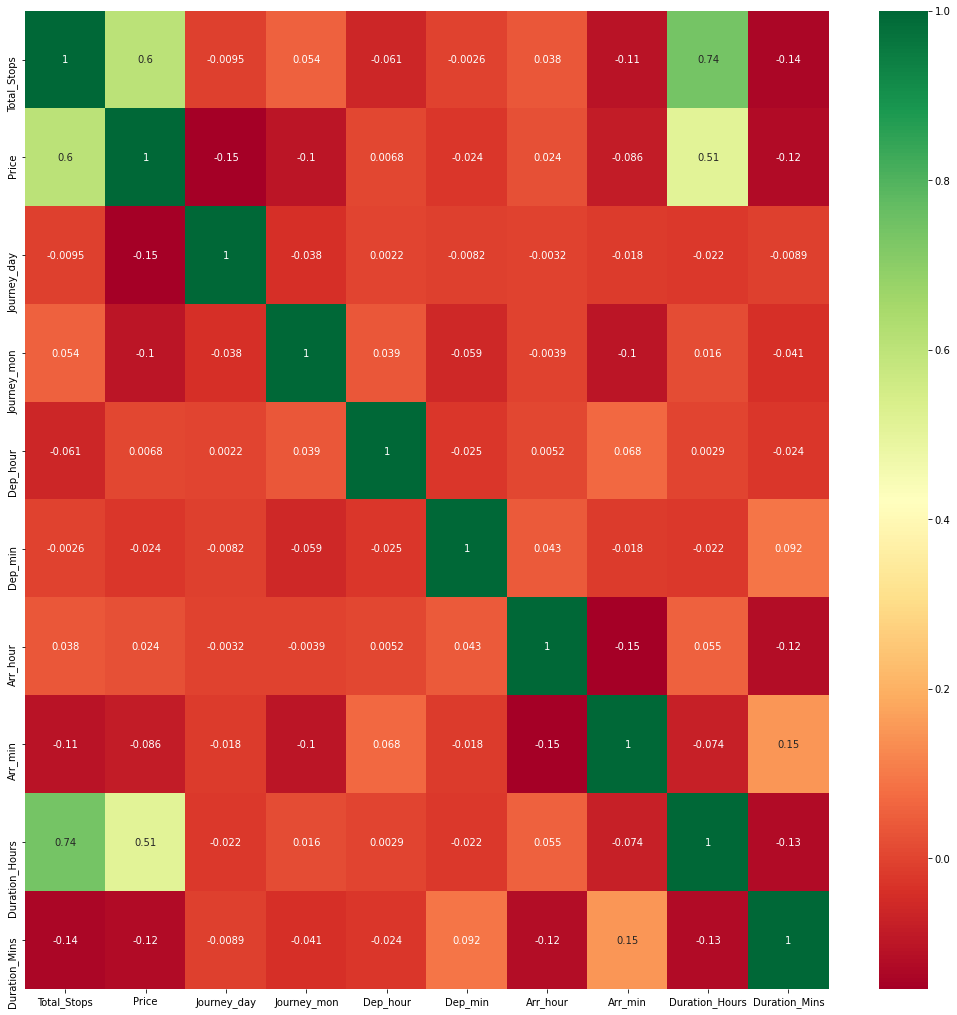

In [ ]:
plt.figure(figsize=(18, 18))
sns.heatmap(data=data1.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [34]:
X = train_data.loc[:, ['Total_Stops', 'Journey_day', 'Journey_mon', 'Dep_hour',
       'Dep_min', 'Arr_hour', 'Arr_min', 'Duration_Hours',
       'Duration_Mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_mon,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_Hours,Duration_Mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [35]:
print(X.shape)
print(train_data.shape)

(10682, 29)
(10682, 30)


In [36]:
Y = train_data.iloc[:, 1]
Y.shape

(10682,)

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size = 0.2, random_state = 42)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((8545, 29), (2137, 29), (8545,), (2137,))

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import minmax_scale
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [39]:
x_train_scaled = minmax_scale(X_train)

In [41]:
lin_reg = LinearRegression()
rnf_reg = RandomForestRegressor()
svm_reg = SVR()

In [42]:
for clf in (lin_reg, svm_reg):
  clf.fit(x_train_scaled, y_train)
  y_pred = clf.predict(X_val)
  print(clf.__class__.__name__ , mean_absolute_error(y_val, y_pred),mean_squared_error(y_val, y_pred))

LinearRegression 22976.15910154422 774976897.327211
SVR 3661.5363770108625 22640116.63788331


In [43]:
rnf_reg.fit(X_train, y_train)
y_pred  = rnf_reg.predict(X_val)
mean_absolute_error(y_val, y_pred), mean_squared_error(y_val, y_pred)

(1175.5011084222801, 4382092.892155511)

In [45]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [46]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [49]:
rf_random = RandomizedSearchCV(estimator = rnf_reg, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [50]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   6.8s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [51]:
rf_random.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 15,
 'n_estimators': 700}

In [53]:
prediction = rf_random.predict(X_val)

In [58]:
mean_absolute_error(y_val, prediction), mean_squared_error(y_val, prediction)


(1163.9117408236632, 4052387.729865462)